# Solving differential equations

- by Börge Göbel

## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)\\)

Since \\( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}\\), we know that \\( y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)\\).

Therefore, we can repetitively iterate the propagation: 

From the value \\( y_n \\) at step \\( n \\), corresponding to the time \\( t \\), we can calculate the value \\( y_{n+1} \\) at step \\( (n+1) \\), corresponding to the time \\( (t+h) \\):

\\( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h \\) which is 

\\( y_{n+1} = y_n + f(t,y_n) h \\)

### Example 1) Radioactive decay

\\( \dot{y} = -y\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y\\)

Analytical solution: \\( y(t)=y_0 \exp(-t)\\)

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [2]:
# Number of iteratrions
nmax = 200

# Starting value
y = 1

# Step size
h = 0.01

# Collect data
t_values = [0]
y_values = [1]

for i in range(1, nmax+1):
    f = -y
    y = y + f*h
    t_values.append((i)*h)
    y_values.append(y)

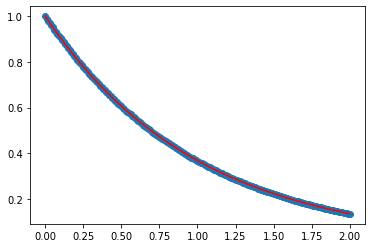

In [3]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = np.exp(-test_t)

plt.plot(test_t, test_y, 'r')
plt.scatter(t_values, y_values)

In [4]:
np.exp(-nmax*h)

0.1353352832366127

### Define a function "eulerODE"

In [5]:
def eulerODE(f, t0, y0, nmax, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(1, nmax+1):
        y = y + f(t, y)*h
        t = t + h
        t_values.append((i)*h)
        y_values.append(y)
    return np.array([t_values, y_values])

In [6]:
def f(t, y):
    return -y

t0 = 0
y0 = 1
nmax = 200
h = 0.01

solution = eulerODE(f, t0, y0, nmax, h)

In [7]:
plt.scatter(data[0], data[1])
plt.plot(test_t, test_y, 'r')

NameError: name 'data' is not defined

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

In [ ]:
a = 0.01

def f(t, y):
    return -a*y*t

t0 = 0
y0 = 1
nmax = 300
h = 0.1

solution = eulerODE(f, t0, y0, nmax, h)

In [8]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2*a/2)

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])
plt.plot(test_t, test_y, 'r')

NameError: name 'a' is not defined

### 1.2 Higher-order differential equations

Example: Second-order differential equation: \\( y''(t) = f\left(t,y(t),y'(t)\right)\\)

Introduce: \\( z_0(t) = y(t)\\) and \\( z_1(t) = y'(t)\\)

\\( \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}\\)

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

\\( z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h \\)

\\( z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h \\)

Or, going back to our initial nomenclature:

\\( y_{n+1} = y_{n} + y'_{n} h \\)

\\( y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h \\)

In [9]:
def eulerODE2(f, t0, y00, y10, nmax, h):
    t_values = [t0]
    t = t0
    y0 = y00
    y1 = y10
    y0_values = [y0]
    y1_values = [y1]
    for i in range(1, nmax+1):
        y0 = y0 + y1*h
        y1 = y1 + f(t, y0, y1)*h
        t = t + h
        t_values.append((i)*h)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

### Example 3) Free fall

\\( \ddot{y} = -g\\) or

\\( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g\\)

Analytical solution: \\( y(t)=-\frac{g}{2}t^2+v_0t+y_0\\)

In [10]:
g = 9.81
nmax = 100
h = 0.1
t0 = 0
y00 = 10
y10 = 50

def f(t, y, y0):
    return -g

solution = eulerODE2(f, t0, y00, y10, nmax, h)

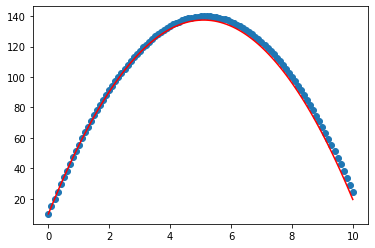

In [11]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2 * test_t**2 + y10*test_t + y00

plt.plot(test_t, test_y, 'r')
plt.scatter(solution[0], solution[1])

### Example 4) Harmonic oscillator

\\( \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 \\)

Here, \\( b \\) is the damping parameter and \\( c \\) is determined by the pendulum length \\( c = \frac{g}{l} \\).

In [12]:
b = 0
length = 2

c = 9.81/length

def f(t, y0, y1):
    return -b*y1 - c*np.sin(y0)

nmax = 200
h = 0.1
t0 = 0
y00 = np.pi / 100
y10 = 0

solution = eulerODE2(f, t0, y00, y10, nmax, h)

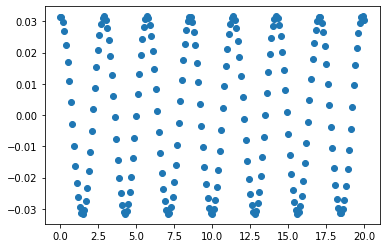

In [13]:
plt.scatter(solution[0], solution[1])

### Small-angle approximation

For small angles \\( \theta\ll 1 \\) and without damping b = 0, we have 

\\( \theta''(t) = - \frac{g}{l}\theta(t) \\) with the solution (for \\( \theta'(0) = 0 \\))

\\( \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \\) and a period of \\( T = 2\pi\sqrt{\frac{l}{g}} \\)

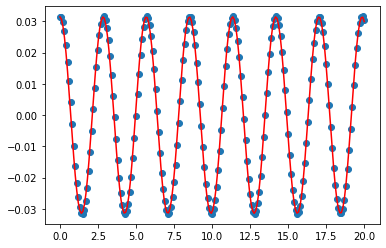

In [14]:
t_test = np.linspace(0, nmax*h, nmax)
y_test = y00*np.cos(np.sqrt(c)*t_test)

plt.scatter(solution[0], solution[1])
plt.plot(t_test, y_test, 'r')

### Actual equation

- Small starting angle

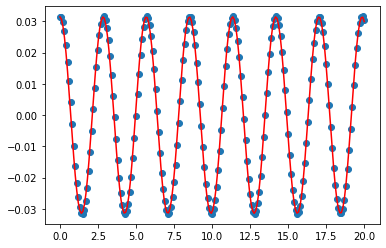

In [15]:
solution = eulerODE2(f, t0, y00, y10, nmax, h)
t_test = np.linspace(0, nmax*h, nmax)
y_test = y00*np.cos(np.sqrt(c)*t_test)

plt.scatter(solution[0], solution[1])
plt.plot(t_test, y_test, 'r')

- Large starting angle

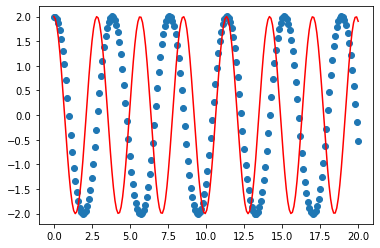

In [16]:
y00 = 2

solution = eulerODE2(f, t0, y00, y10, nmax, h)
t_test = np.linspace(0, nmax*h, nmax)
y_test = y00*np.cos(np.sqrt(c)*t_test)

plt.scatter(solution[0], solution[1])
plt.plot(t_test, y_test, 'r')

- With damping

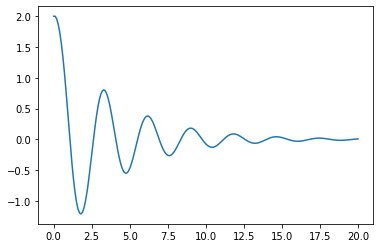

In [17]:
b = 0.5

solution = eulerODE2(f, t0, y00, y10, nmax, h)
t_test = np.linspace(0, nmax*h, nmax)
y_test = y00*np.cos(np.sqrt(c)*t_test)

plt.plot(solution[0], solution[1])
# plt.plot(t_test, y_test, 'r')

- Driven oscillator

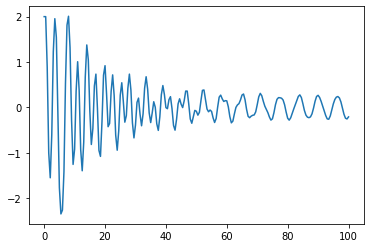

In [18]:
b = 0.1
d = -1.0
omega = 1.0
length = 2

c = 9.81/length

def f(t, y0, y1):
    return -b*y1 - c*np.sin(y0) - d*np.sin(omega*t)

nmax = 200
h = 0.5
t0 = 0
y00 = 2.0
y10 = 0

solution = eulerODE2(f, t0, y00, y10, nmax, h)

plt.plot(solution[0], solution[1])

# 2. Improved methods

The exist two useful solvers:
- Old: scipy.integrate.oldeint
- New: scipy.integrate.solve_ivp

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

- Our old results (Euler method)

In [19]:
a = 0.01

def f(t, y):
    return -a*y*t

t0 = 0
y0 = 1
nmax = 300
h = 0.1

solution = eulerODE(f, t0, y0, nmax, h)

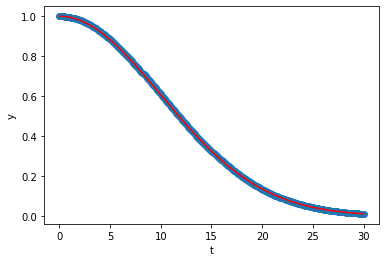

In [20]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2*a/2)

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])
plt.plot(test_t, test_y, 'r')

- New results (solve_ivp)

In [21]:
solution = integrate.solve_ivp(f, [0, 30], [y0], method='RK45', t_eval=np.linspace(0, nmax*h, nmax))

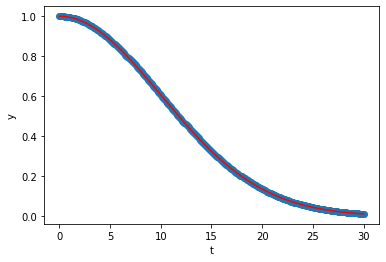

In [22]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2*a/2)

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution.t, solution.y)
plt.plot(test_t, test_y, 'r')

### Example 3) Free fall

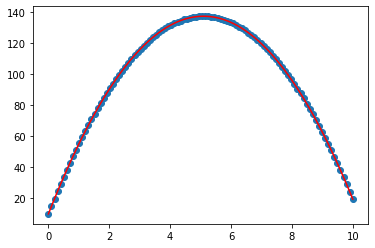

In [23]:
g = 9.81
nmax = 100
h = 0.1
t0 = 0
y00 = 10
y10 = 50

def f(t, y):
    return y[1], -g

# solution = eulerODE2(f, t0, y00, y10, nmax, h)
solution = integrate.solve_ivp(f, [0, 10], [y00, y10], method='RK45', t_eval=np.linspace(0, nmax*h, nmax))

test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2 * test_t**2 + y10*test_t + y00

plt.plot(test_t, test_y, 'r')
plt.scatter(solution.t, solution.y[0])

### Example 4) Driven pendulum

- Our old results (Euler method)

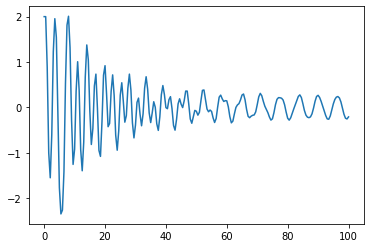

In [24]:
b = 0.1
d = -1.0
omega = 1.0
length = 2

c = 9.81/length

def f(t, y0, y1):
    return -b*y1 - c*np.sin(y0) - d*np.sin(omega*t)

nmax = 200
h = 0.5
t0 = 0
y00 = 2.0
y10 = 0

solution = eulerODE2(f, t0, y00, y10, nmax, h)

plt.plot(solution[0], solution[1])

- New results (solve_ivp)

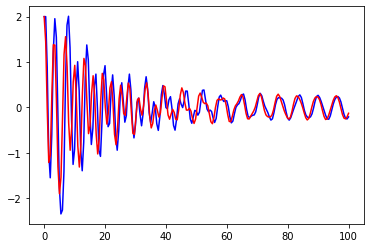

In [25]:
def f(t, y):
    return y[1], -b*y[1] - c*np.sin(y[0]) - d*np.sin(omega*t)

nmax = 200
h = 0.5
t0 = 0
y00 = 2.0
y10 = 0

solution_RK45 = integrate.solve_ivp(f, [0, 100], [y00, y10], method='RK45', t_eval=np.linspace(0, nmax*h, nmax))

plt.plot(solution[0], solution[1], 'b')
plt.plot(solution_RK45.t, solution_RK45.y[0], 'r')

### Compare more methods

In [26]:
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]
# methods:
# RK45
# RK23
# DOP853
# Radau
# BDF
# LSODA

## 3. Theory of the Runge-Kutta methods

There exist several different Runge-Kutta methods

Derivation is difficult: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge%E2%80%93Kutta_fourth-order_method

### 3.1 Implementation of RK4

In [27]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method]

def rk4(f, t0, y0, nmax, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(1, nmax+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        k = 1/6*k1 + 1/3*k2 + 1/3*k3 + 1/6*k4
        y = y + k
        t = t + h
        t_values.append((i)*h)
        y_values.append(y)
    return np.array([t_values, y_values])

### 3.2 Implementation of RK45

In [29]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]

def rk45(f, t0, y0, nmax, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for i in range(1, nmax+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + h*3/8, y + k1*3/32 + k2*9/32)
        k4 = h * f(t + h*12/13, y + k1*1932/2197 - k2*7200/2197 + k3*7296/2197)
        k5 = h * f(t + h, y + k1*439/216 - k2*8 + k3*3680/513 - k4*845/4104)
        k6 = h * f(t + h/2, y - k1*8/27 + k2*2 - k3*3544/2565 + k4*1859/4104 - k5*11/40)
        k = 16/135*k1 + 0*k2 + 6656/12825*k3 + 28561/56430*k4 - 9/50*k5 + 2/55*k6
        y = y + k
        t = t + h
        t_values.append((i)*h)
        y_values.append(y)
    return np.array([t_values, y_values])

### 3.3 Comparison with Euler method

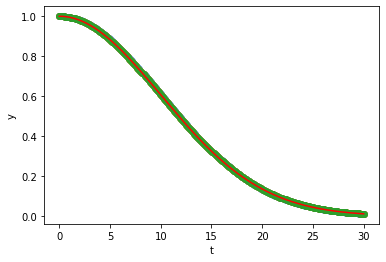

In [40]:
a = 0.01

def f(t, y):
    return -a*y*t

t0 = 0
y0 = 1
nmax = 300
h = 0.1

solution_euler = eulerODE(f, t0, y0, nmax, h)
solution_rk4 = rk4(f, t0, y0, nmax, h)
solution_rk45 = rk45(f, t0, y0, nmax, h)

test_t = np.linspace(0, nmax*h, nmax+1)
test_y = y0*np.exp(-test_t**2*a/2)

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution_euler[0], solution_euler[1])
plt.scatter(solution_rk4[0], solution_rk4[1])
plt.scatter(solution_rk45[0], solution_rk45[1])
plt.plot(test_t, test_y, 'r')

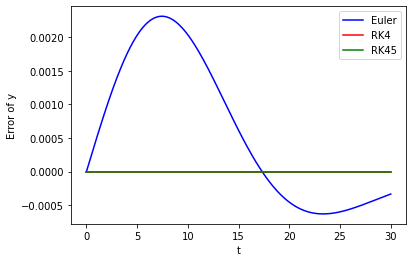

In [45]:
plt.xlabel('t')
plt.ylabel('Error of y')
plt.plot(solution_euler[0], solution_euler[1] - test_y, 'blue', label='Euler')
plt.plot(solution_rk4[0], solution_rk4[1] - test_y, 'red', label='RK4')
plt.plot(solution_rk45[0], solution_rk45[1] - test_y, 'green', label='RK45')
plt.legend()

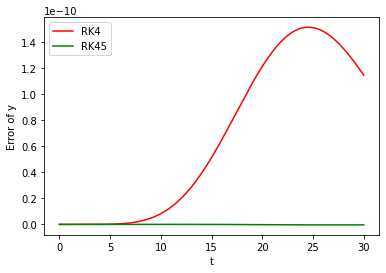

In [46]:
plt.xlabel('t')
plt.ylabel('Error of y')
# plt.plot(solution_euler[0], solution_euler[1] - test_y, 'blue', label='Euler')
plt.plot(solution_rk4[0], solution_rk4[1] - test_y, 'red', label='RK4')
plt.plot(solution_rk45[0], solution_rk45[1] - test_y, 'green', label='RK45')
plt.legend()